### План

* Детекция лиц
* Определение человека на фото
* Ключевые точки
* Пример распознования лиц на видео
* Проблемы распознавания лиц и их решения



### Детекция лиц



Простая библиотека https://github.com/ageitgey/face_recognition

Точность (accuracy) — 99.38% на датасете «Labeled Faces in the Wild».

State-of-the-art на май 2020 — 99.85% (https://github.com/zma-c-137/VarGFaceNet)

Устанавливаем face_recognition из Python Package Index (PyPI)


In [ ]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 77kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=3ceb6d66ce1e44c347929e1f3595fb598bf7b36cfca2e579a87316bab05c0189
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition

people_image = face_recognition.load_image_file("people.jpg")
# Find all the faces in the image
face_locations = face_recognition.face_locations(people_image)
face_locations

[(43, 1975, 266, 1752), (348, 1418, 669, 1097), (708, 605, 1170, 142)]

In [ ]:
help(face_recognition.face_locations)

Help on function face_locations in module face_recognition.api:

face_locations(img, number_of_times_to_upsample=1, model='hog')
    Returns an array of bounding boxes of human faces in a image
    
    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order



Визуализируем найденные прямоугольники

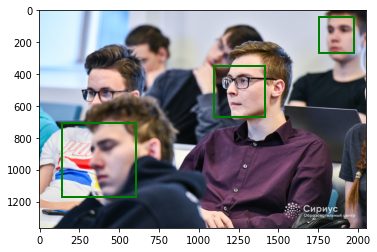

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots()
# Display the image
ax.imshow(people_image)

for location in face_locations:
  top, right, bottom, left = location
  # Create a Rectangle patch
  rect = patches.Rectangle((left, top), 
                           width=abs(right - left), height=abs(top - bottom),
                           linewidth=2, edgecolor='g', facecolor='none')
  # Add the patch to the Axes
  ax.add_patch(rect)

plt.show()


In [ ]:
ana_armas = face_recognition.load_image_file("ana-armas.jpg")
marta_cabrera = face_recognition.load_image_file("marta-cabrera-knives-out.jpg")

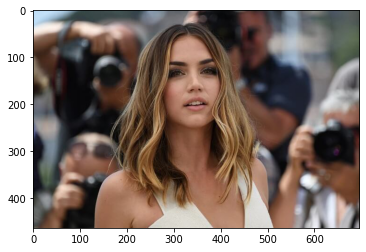

In [ ]:
plt.imshow(ana_armas)

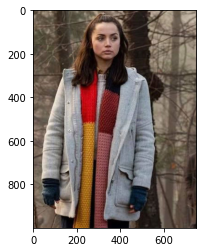

In [ ]:
plt.imshow(marta_cabrera)

In [ ]:
second_human_encoding = face_recognition.face_encodings(people_image)[1]
ana_armas_encoding = face_recognition.face_encodings(ana_armas)[0]
marta_cabrera_encoding = face_recognition.face_encodings(marta_cabrera)[0]

# distance is cosine distance
# это просто косинус угла между векторами, который равен скалярному произведению, деленному на длины векторов
face_recognition.compare_faces([second_human_encoding, ana_armas_encoding], 
                               marta_cabrera_encoding)

[False, True]

### Ключевые точки

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(ana_armas)

In [ ]:
face_landmarks_list

[{'bottom_lip': [(371, 202),
   (364, 209),
   (355, 213),
   (348, 215),
   (341, 215),
   (330, 212),
   (319, 205),
   (325, 205),
   (341, 204),
   (348, 204),
   (354, 203),
   (366, 201)],
  'chin': [(268, 154),
   (270, 172),
   (273, 189),
   (278, 207),
   (285, 223),
   (297, 236),
   (312, 244),
   (330, 251),
   (348, 252),
   (365, 248),
   (378, 239),
   (390, 228),
   (398, 213),
   (402, 196),
   (405, 178),
   (405, 161),
   (403, 143)],
  'left_eye': [(295, 139),
   (302, 133),
   (311, 131),
   (320, 136),
   (312, 139),
   (303, 141)],
  'left_eyebrow': [(281, 119), (291, 112), (303, 109), (315, 110), (328, 114)],
  'nose_bridge': [(341, 129), (343, 138), (345, 147), (347, 157)],
  'nose_tip': [(334, 173), (340, 174), (347, 175), (352, 173), (358, 171)],
  'right_eye': [(359, 134),
   (368, 129),
   (377, 129),
   (384, 134),
   (377, 136),
   (368, 136)],
  'right_eyebrow': [(350, 113),
   (361, 107),
   (373, 104),
   (384, 104),
   (395, 111)],
  'top_lip': [(319

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


def digital_makeup(image):
  # Find all facial features in all the faces in the image
  face_landmarks_list = face_recognition.face_landmarks(image)

  pil_image = Image.fromarray(image)

  plt.figure(figsize=(15, 15))
  plt.subplot(1, 2, 1)
  plt.imshow(pil_image)

  for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

    plt.subplot(1, 2, 2)
    plt.imshow(pil_image)


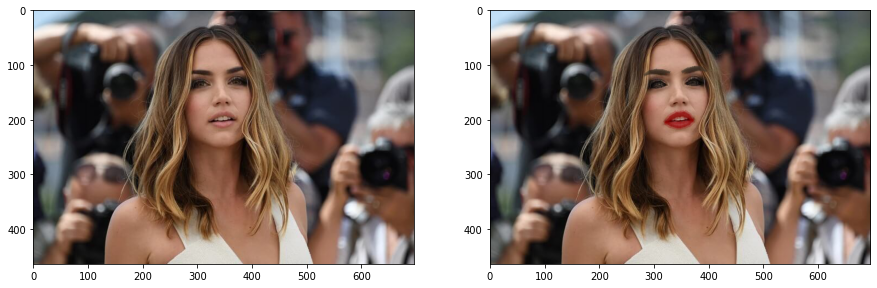

In [ ]:
digital_makeup(ana_armas)

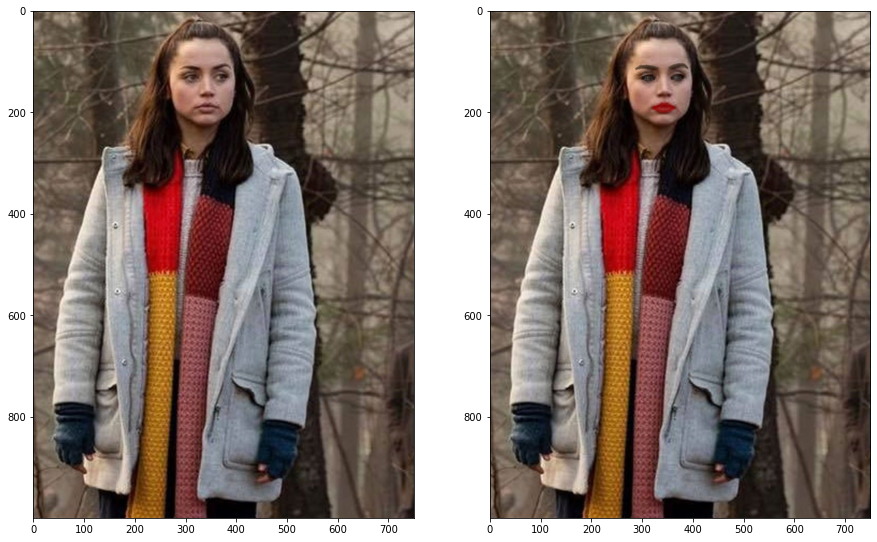

In [ ]:
digital_makeup(marta_cabrera)

Примерно так и работают всякие маски в SnapChat, FaceApp и тому подобдных приложениях

### Распознавание лиц на видео

На каждом кадре делаем распознавание независимо, потом склеиваем в видео.

Можно не на каждом кадре, а только на ключевых (для скорости), можно ещё сглаживать.

Простая популярная библиотека для трекинга объектов: https://github.com/abewley/sort

Более навороченый вариант [YOLOv3, Deep SORT at TensorFlow](https://www.youtube.com/watch?v=Cf1INvUsvkM).



#### Фильтр Калмана


Решает проблему неточности измерений. В библиотеке выше используется [фильтр Калмана](https://habr.com/ru/post/166693/) — алгоритм, позволяющий соединить результаты детекции на текущем и предыдущих кадрах в своего рода физической модели. Практически идентичен экспоненциальному сглаживанию. [Подробная книга про фильтр Калмана (англ.)](https://nbviewer.jupyter.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb)

------
Например,
$x_{k+1} = x_k + u_k + \xi_k$ — уравнение изменения координаты

$x_k$ — координата

$u_k$ — известная управляющая функция (скорость)

$\xi_k \in N(\mu_\xi, \sigma_\xi)$ — случайная ошибка модели

$z_{k} = x_k + \eta_k$ — полученное с сенсора значение

$\eta_k \in N(\mu_\eta, \sigma_\eta)$ — случайная ошибка сенсора

------

$E(e_0^2)=E(\eta_0^2)=\sigma_\eta^2$

$E(e_{k+1}^2)=\frac{\sigma_\eta^2(Ee_k^2+\sigma_\xi^2)}{Ee_k^2+\sigma_\xi^2+\sigma_\eta^2}$ — среднее значение квадрата ошибки

$K_{k+1} = \frac{E(e_{k+1}^2)}{\sigma_\eta^2}$ — усиление Калмана

$x_0^{opt} = z_0$ — база итерации

$x_{k+1}^{opt} = K_{k+1} z_{k+1} + (1-K_{k+1})(x_{k}^{opt}+u_k)$ — оптимальное отфильтрованное значение

-----


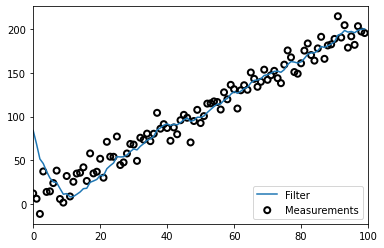

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
from gh_internal import plot_g_h_results

def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)

zs = gen_data(x0=5., dx=2., count=100, noise_factor=10)
data = g_h_filter(data=zs, x0=100., dx=2., dt=1., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

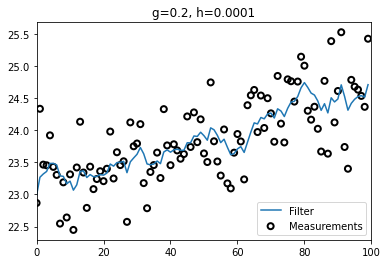

In [ ]:
def compute_new_position(pos, vel, dt=1.):
    """ dt is the time delta in seconds."""
    return pos + (vel * dt)

def measure_position(pos):
    return pos + randn()*500
    
def gen_train_data(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos))
    return np.asarray(zs)

pos, vel = 23.*1000, 15.    
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.2, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.2, h=0.0001')

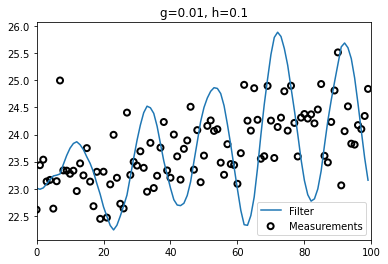

In [ ]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=0.01, h=0.1)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.1')

#### Пример распознавания в видеофайле

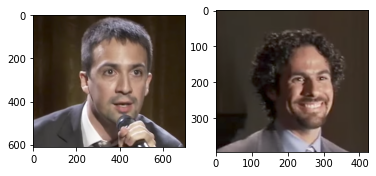

In [ ]:
from PIL import Image

plt.subplot(1, 2, 1)
plt.imshow(Image.open("lin-manuel-miranda.png"))
plt.subplot(1, 2, 2)
plt.imshow(Image.open("alex-lacamoire.png"))

In [ ]:
import face_recognition
import cv2
from tqdm import tqdm

# This is a demo of running face recognition on a video file and saving the results to a new video file.
#
# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Open the input movie file
input_movie = cv2.VideoCapture("short_hamilton_clip.mp4")
length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

# Create an output movie file (make sure resolution/frame rate matches input video!)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_movie = cv2.VideoWriter('output.avi', fourcc, 29.97, (640, 360))

# Load some sample pictures and learn how to recognize them.
lmm_image = face_recognition.load_image_file("lin-manuel-miranda.png")
lmm_face_encoding = face_recognition.face_encodings(lmm_image)[0]

al_image = face_recognition.load_image_file("alex-lacamoire.png")
al_face_encoding = face_recognition.face_encodings(al_image)[0]

known_faces = [
    lmm_face_encoding,
    al_face_encoding
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
frame_number = 0

for _ in tqdm(range(length)):
    # Grab a single frame of video
    ret, frame = input_movie.read()
    frame_number += 1

    # Quit when the input video file ends
    if not ret:
        break

    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.7)

        # If you had more than 2 faces, you could make this logic a lot prettier
        # but I kept it simple for the demo
        name = None
        if match[0]:
            name = "Lin-Manuel Miranda"
        elif match[1]:
            name = "Alex Lacamoire"

        face_names.append(name)

    # Label the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        if not name:
            continue

        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
    print("Writing frame {} / {}".format(frame_number, length))
    output_movie.write(frame)

# All done!
input_movie.release()
cv2.destroyAllWindows()

  1%|          | 2/275 [00:00<00:48,  5.65it/s]

Writing frame 1 / 275
Writing frame 2 / 275


  1%|▏         | 4/275 [00:00<00:46,  5.80it/s]

Writing frame 3 / 275
Writing frame 4 / 275


  2%|▏         | 6/275 [00:01<00:46,  5.82it/s]

Writing frame 5 / 275
Writing frame 6 / 275


  3%|▎         | 8/275 [00:01<00:45,  5.85it/s]

Writing frame 7 / 275
Writing frame 8 / 275


  4%|▎         | 10/275 [00:01<00:44,  5.99it/s]

Writing frame 9 / 275
Writing frame 10 / 275


  4%|▍         | 12/275 [00:02<00:43,  6.00it/s]

Writing frame 11 / 275
Writing frame 12 / 275


  5%|▌         | 14/275 [00:02<00:43,  6.07it/s]

Writing frame 13 / 275
Writing frame 14 / 275


  6%|▌         | 16/275 [00:02<00:42,  6.07it/s]

Writing frame 15 / 275
Writing frame 16 / 275


  7%|▋         | 18/275 [00:03<00:42,  6.02it/s]

Writing frame 17 / 275
Writing frame 18 / 275


  7%|▋         | 20/275 [00:03<00:42,  6.03it/s]

Writing frame 19 / 275
Writing frame 20 / 275


  8%|▊         | 22/275 [00:03<00:41,  6.16it/s]

Writing frame 21 / 275
Writing frame 22 / 275


  9%|▊         | 24/275 [00:03<00:40,  6.24it/s]

Writing frame 23 / 275
Writing frame 24 / 275


  9%|▉         | 26/275 [00:04<00:40,  6.19it/s]

Writing frame 25 / 275
Writing frame 26 / 275


 10%|█         | 28/275 [00:04<00:39,  6.26it/s]

Writing frame 27 / 275
Writing frame 28 / 275
Writing frame 29 / 275


 11%|█▏        | 31/275 [00:05<00:38,  6.34it/s]

Writing frame 30 / 275
Writing frame 31 / 275


 12%|█▏        | 33/275 [00:05<00:38,  6.37it/s]

Writing frame 32 / 275
Writing frame 33 / 275


 13%|█▎        | 35/275 [00:05<00:37,  6.48it/s]

Writing frame 34 / 275
Writing frame 35 / 275


 13%|█▎        | 37/275 [00:06<00:37,  6.40it/s]

Writing frame 36 / 275
Writing frame 37 / 275


 14%|█▍        | 39/275 [00:06<00:36,  6.41it/s]

Writing frame 38 / 275
Writing frame 39 / 275


 15%|█▍        | 41/275 [00:06<00:36,  6.36it/s]

Writing frame 40 / 275
Writing frame 41 / 275


 16%|█▌        | 43/275 [00:06<00:36,  6.39it/s]

Writing frame 42 / 275
Writing frame 43 / 275


 16%|█▋        | 45/275 [00:07<00:35,  6.39it/s]

Writing frame 44 / 275
Writing frame 45 / 275


 17%|█▋        | 47/275 [00:07<00:35,  6.44it/s]

Writing frame 46 / 275
Writing frame 47 / 275


 18%|█▊        | 49/275 [00:07<00:36,  6.17it/s]

Writing frame 48 / 275
Writing frame 49 / 275


 19%|█▊        | 51/275 [00:08<00:37,  5.99it/s]

Writing frame 50 / 275
Writing frame 51 / 275


 19%|█▉        | 53/275 [00:08<00:36,  6.03it/s]

Writing frame 52 / 275
Writing frame 53 / 275


 20%|██        | 55/275 [00:08<00:35,  6.12it/s]

Writing frame 54 / 275
Writing frame 55 / 275
Writing frame 56 / 275


 21%|██        | 58/275 [00:09<00:34,  6.27it/s]

Writing frame 57 / 275
Writing frame 58 / 275


 22%|██▏       | 60/275 [00:09<00:33,  6.37it/s]

Writing frame 59 / 275
Writing frame 60 / 275


 23%|██▎       | 62/275 [00:10<00:33,  6.36it/s]

Writing frame 61 / 275
Writing frame 62 / 275


 23%|██▎       | 64/275 [00:10<00:33,  6.30it/s]

Writing frame 63 / 275
Writing frame 64 / 275


 24%|██▍       | 66/275 [00:10<00:33,  6.30it/s]

Writing frame 65 / 275
Writing frame 66 / 275


 25%|██▍       | 68/275 [00:10<00:32,  6.28it/s]

Writing frame 67 / 275
Writing frame 68 / 275


 25%|██▌       | 70/275 [00:11<00:32,  6.27it/s]

Writing frame 69 / 275
Writing frame 70 / 275


 26%|██▌       | 72/275 [00:11<00:32,  6.29it/s]

Writing frame 71 / 275
Writing frame 72 / 275


 27%|██▋       | 74/275 [00:11<00:32,  6.22it/s]

Writing frame 73 / 275
Writing frame 74 / 275


 28%|██▊       | 76/275 [00:12<00:31,  6.24it/s]

Writing frame 75 / 275
Writing frame 76 / 275


 28%|██▊       | 78/275 [00:12<00:31,  6.29it/s]

Writing frame 77 / 275
Writing frame 78 / 275


 29%|██▉       | 80/275 [00:12<00:30,  6.33it/s]

Writing frame 79 / 275
Writing frame 80 / 275


 30%|██▉       | 82/275 [00:13<00:30,  6.26it/s]

Writing frame 81 / 275
Writing frame 82 / 275


 31%|███       | 84/275 [00:13<00:31,  6.12it/s]

Writing frame 83 / 275
Writing frame 84 / 275


 31%|███▏      | 86/275 [00:13<00:31,  6.06it/s]

Writing frame 85 / 275
Writing frame 86 / 275


 32%|███▏      | 88/275 [00:14<00:31,  5.95it/s]

Writing frame 87 / 275
Writing frame 88 / 275


 33%|███▎      | 90/275 [00:14<00:31,  5.95it/s]

Writing frame 89 / 275
Writing frame 90 / 275


 33%|███▎      | 92/275 [00:14<00:30,  6.00it/s]

Writing frame 91 / 275
Writing frame 92 / 275


 34%|███▍      | 94/275 [00:15<00:30,  5.92it/s]

Writing frame 93 / 275
Writing frame 94 / 275


 35%|███▍      | 96/275 [00:15<00:29,  6.00it/s]

Writing frame 95 / 275
Writing frame 96 / 275


 36%|███▌      | 98/275 [00:15<00:29,  5.95it/s]

Writing frame 97 / 275
Writing frame 98 / 275


 36%|███▋      | 100/275 [00:16<00:29,  5.87it/s]

Writing frame 99 / 275
Writing frame 100 / 275


 37%|███▋      | 102/275 [00:16<00:29,  5.80it/s]

Writing frame 101 / 275
Writing frame 102 / 275


 38%|███▊      | 104/275 [00:16<00:29,  5.81it/s]

Writing frame 103 / 275
Writing frame 104 / 275


 39%|███▊      | 106/275 [00:17<00:29,  5.80it/s]

Writing frame 105 / 275
Writing frame 106 / 275


 39%|███▉      | 108/275 [00:17<00:28,  5.91it/s]

Writing frame 107 / 275
Writing frame 108 / 275


 40%|████      | 110/275 [00:17<00:27,  6.00it/s]

Writing frame 109 / 275
Writing frame 110 / 275


 41%|████      | 112/275 [00:18<00:27,  5.88it/s]

Writing frame 111 / 275
Writing frame 112 / 275


 41%|████▏     | 114/275 [00:18<00:27,  5.83it/s]

Writing frame 113 / 275
Writing frame 114 / 275


 42%|████▏     | 116/275 [00:19<00:28,  5.65it/s]

Writing frame 115 / 275
Writing frame 116 / 275


 43%|████▎     | 118/275 [00:19<00:27,  5.80it/s]

Writing frame 117 / 275
Writing frame 118 / 275


 44%|████▎     | 120/275 [00:19<00:25,  6.00it/s]

Writing frame 119 / 275
Writing frame 120 / 275


 44%|████▍     | 122/275 [00:20<00:25,  5.95it/s]

Writing frame 121 / 275
Writing frame 122 / 275


 45%|████▌     | 124/275 [00:20<00:25,  5.91it/s]

Writing frame 123 / 275
Writing frame 124 / 275


 46%|████▌     | 126/275 [00:20<00:25,  5.81it/s]

Writing frame 125 / 275
Writing frame 126 / 275


 47%|████▋     | 128/275 [00:21<00:25,  5.78it/s]

Writing frame 127 / 275
Writing frame 128 / 275


 47%|████▋     | 130/275 [00:21<00:25,  5.78it/s]

Writing frame 129 / 275
Writing frame 130 / 275


 48%|████▊     | 132/275 [00:21<00:24,  5.85it/s]

Writing frame 131 / 275
Writing frame 132 / 275


 49%|████▊     | 134/275 [00:22<00:23,  5.88it/s]

Writing frame 133 / 275
Writing frame 134 / 275


 49%|████▉     | 136/275 [00:22<00:23,  5.81it/s]

Writing frame 135 / 275
Writing frame 136 / 275


 50%|█████     | 138/275 [00:22<00:23,  5.81it/s]

Writing frame 137 / 275
Writing frame 138 / 275


 51%|█████     | 140/275 [00:23<00:23,  5.86it/s]

Writing frame 139 / 275
Writing frame 140 / 275


 52%|█████▏    | 142/275 [00:23<00:23,  5.74it/s]

Writing frame 141 / 275
Writing frame 142 / 275


 52%|█████▏    | 144/275 [00:23<00:22,  5.79it/s]

Writing frame 143 / 275
Writing frame 144 / 275


 53%|█████▎    | 146/275 [00:24<00:22,  5.80it/s]

Writing frame 145 / 275
Writing frame 146 / 275


 54%|█████▍    | 148/275 [00:24<00:22,  5.75it/s]

Writing frame 147 / 275
Writing frame 148 / 275


 55%|█████▍    | 150/275 [00:24<00:22,  5.61it/s]

Writing frame 149 / 275
Writing frame 150 / 275


 55%|█████▌    | 152/275 [00:25<00:21,  5.63it/s]

Writing frame 151 / 275
Writing frame 152 / 275


 56%|█████▌    | 154/275 [00:25<00:21,  5.70it/s]

Writing frame 153 / 275
Writing frame 154 / 275


 57%|█████▋    | 156/275 [00:25<00:20,  5.79it/s]

Writing frame 155 / 275
Writing frame 156 / 275


 57%|█████▋    | 158/275 [00:26<00:20,  5.83it/s]

Writing frame 157 / 275
Writing frame 158 / 275


 58%|█████▊    | 160/275 [00:26<00:19,  5.79it/s]

Writing frame 159 / 275
Writing frame 160 / 275


 59%|█████▉    | 162/275 [00:26<00:19,  5.78it/s]

Writing frame 161 / 275
Writing frame 162 / 275


 60%|█████▉    | 164/275 [00:27<00:19,  5.56it/s]

Writing frame 163 / 275
Writing frame 164 / 275


 60%|██████    | 166/275 [00:27<00:19,  5.64it/s]

Writing frame 165 / 275
Writing frame 166 / 275


 61%|██████    | 168/275 [00:28<00:18,  5.72it/s]

Writing frame 167 / 275
Writing frame 168 / 275


 62%|██████▏   | 170/275 [00:28<00:18,  5.80it/s]

Writing frame 169 / 275
Writing frame 170 / 275


 63%|██████▎   | 172/275 [00:28<00:17,  5.76it/s]

Writing frame 171 / 275
Writing frame 172 / 275


 63%|██████▎   | 174/275 [00:29<00:18,  5.55it/s]

Writing frame 173 / 275
Writing frame 174 / 275


 64%|██████▍   | 176/275 [00:29<00:17,  5.69it/s]

Writing frame 175 / 275
Writing frame 176 / 275


 65%|██████▍   | 178/275 [00:29<00:16,  5.82it/s]

Writing frame 177 / 275
Writing frame 178 / 275


 65%|██████▌   | 180/275 [00:30<00:15,  5.96it/s]

Writing frame 179 / 275
Writing frame 180 / 275


 66%|██████▌   | 182/275 [00:30<00:15,  5.96it/s]

Writing frame 181 / 275
Writing frame 182 / 275


 67%|██████▋   | 184/275 [00:30<00:15,  6.00it/s]

Writing frame 183 / 275
Writing frame 184 / 275


 68%|██████▊   | 186/275 [00:31<00:14,  5.98it/s]

Writing frame 185 / 275
Writing frame 186 / 275


 68%|██████▊   | 188/275 [00:31<00:14,  5.83it/s]

Writing frame 187 / 275
Writing frame 188 / 275


 69%|██████▉   | 190/275 [00:31<00:14,  5.94it/s]

Writing frame 189 / 275
Writing frame 190 / 275


 70%|██████▉   | 192/275 [00:32<00:13,  5.96it/s]

Writing frame 191 / 275
Writing frame 192 / 275


 71%|███████   | 194/275 [00:32<00:13,  5.91it/s]

Writing frame 193 / 275
Writing frame 194 / 275


 71%|███████▏  | 196/275 [00:32<00:13,  5.90it/s]

Writing frame 195 / 275
Writing frame 196 / 275


 72%|███████▏  | 198/275 [00:33<00:13,  5.86it/s]

Writing frame 197 / 275
Writing frame 198 / 275


 73%|███████▎  | 200/275 [00:33<00:13,  5.68it/s]

Writing frame 199 / 275
Writing frame 200 / 275


 73%|███████▎  | 202/275 [00:33<00:12,  5.76it/s]

Writing frame 201 / 275
Writing frame 202 / 275


 74%|███████▍  | 204/275 [00:34<00:12,  5.83it/s]

Writing frame 203 / 275
Writing frame 204 / 275


 75%|███████▍  | 206/275 [00:34<00:11,  5.82it/s]

Writing frame 205 / 275
Writing frame 206 / 275


 76%|███████▌  | 208/275 [00:34<00:11,  5.90it/s]

Writing frame 207 / 275
Writing frame 208 / 275


 76%|███████▋  | 210/275 [00:35<00:11,  5.83it/s]

Writing frame 209 / 275
Writing frame 210 / 275


 77%|███████▋  | 212/275 [00:35<00:11,  5.71it/s]

Writing frame 211 / 275
Writing frame 212 / 275


 78%|███████▊  | 214/275 [00:35<00:10,  5.82it/s]

Writing frame 213 / 275
Writing frame 214 / 275
Writing frame 215 / 275


 79%|███████▉  | 217/275 [00:36<00:09,  5.92it/s]

Writing frame 216 / 275
Writing frame 217 / 275


 80%|███████▉  | 219/275 [00:36<00:09,  5.91it/s]

Writing frame 218 / 275
Writing frame 219 / 275


 80%|████████  | 221/275 [00:37<00:08,  6.04it/s]

Writing frame 220 / 275
Writing frame 221 / 275


 81%|████████  | 223/275 [00:37<00:08,  5.87it/s]

Writing frame 222 / 275
Writing frame 223 / 275


 82%|████████▏ | 225/275 [00:37<00:08,  5.83it/s]

Writing frame 224 / 275
Writing frame 225 / 275


 83%|████████▎ | 227/275 [00:38<00:08,  5.81it/s]

Writing frame 226 / 275
Writing frame 227 / 275


 83%|████████▎ | 229/275 [00:38<00:07,  5.89it/s]

Writing frame 228 / 275
Writing frame 229 / 275
Writing frame 230 / 275


 84%|████████▍ | 232/275 [00:38<00:07,  5.90it/s]

Writing frame 231 / 275
Writing frame 232 / 275


 85%|████████▌ | 234/275 [00:39<00:06,  5.94it/s]

Writing frame 233 / 275
Writing frame 234 / 275


 86%|████████▌ | 236/275 [00:39<00:06,  5.87it/s]

Writing frame 235 / 275
Writing frame 236 / 275


 87%|████████▋ | 238/275 [00:39<00:06,  5.86it/s]

Writing frame 237 / 275
Writing frame 238 / 275


 87%|████████▋ | 240/275 [00:40<00:05,  5.84it/s]

Writing frame 239 / 275
Writing frame 240 / 275


 88%|████████▊ | 242/275 [00:40<00:05,  5.82it/s]

Writing frame 241 / 275
Writing frame 242 / 275


 89%|████████▊ | 244/275 [00:41<00:05,  5.73it/s]

Writing frame 243 / 275
Writing frame 244 / 275


 89%|████████▉ | 246/275 [00:41<00:04,  5.84it/s]

Writing frame 245 / 275
Writing frame 246 / 275


 90%|█████████ | 248/275 [00:41<00:04,  5.82it/s]

Writing frame 247 / 275
Writing frame 248 / 275


 91%|█████████ | 250/275 [00:42<00:04,  5.88it/s]

Writing frame 249 / 275
Writing frame 250 / 275


 92%|█████████▏| 252/275 [00:42<00:03,  6.06it/s]

Writing frame 251 / 275
Writing frame 252 / 275


 92%|█████████▏| 254/275 [00:42<00:03,  6.10it/s]

Writing frame 253 / 275
Writing frame 254 / 275


 93%|█████████▎| 256/275 [00:42<00:03,  6.14it/s]

Writing frame 255 / 275
Writing frame 256 / 275


 94%|█████████▍| 258/275 [00:43<00:02,  6.24it/s]

Writing frame 257 / 275
Writing frame 258 / 275


 95%|█████████▍| 260/275 [00:43<00:02,  6.24it/s]

Writing frame 259 / 275
Writing frame 260 / 275


 95%|█████████▌| 262/275 [00:43<00:02,  6.21it/s]

Writing frame 261 / 275
Writing frame 262 / 275


 96%|█████████▌| 264/275 [00:44<00:01,  6.14it/s]

Writing frame 263 / 275
Writing frame 264 / 275


 97%|█████████▋| 266/275 [00:44<00:01,  6.15it/s]

Writing frame 265 / 275
Writing frame 266 / 275


 97%|█████████▋| 268/275 [00:44<00:01,  6.14it/s]

Writing frame 267 / 275
Writing frame 268 / 275


 98%|█████████▊| 270/275 [00:45<00:00,  6.14it/s]

Writing frame 269 / 275
Writing frame 270 / 275


 99%|█████████▉| 272/275 [00:45<00:00,  6.10it/s]

Writing frame 271 / 275
Writing frame 272 / 275


100%|█████████▉| 274/275 [00:45<00:00,  6.17it/s]

Writing frame 273 / 275
Writing frame 274 / 275
Writing frame 275 / 275


100%|██████████| 275/275 [00:46<00:00,  5.97it/s]


In [ ]:
y!ffmpeg -i output.avi output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

### Проблема малого количества объектов в классе

В задачах классификации обычно сотни и тысячи примеров на каждый класс, а в Labeled Faces in the Wild — единицы. 

1. Triplet loss

$\sum_{i=1}^{N} [(f_i^a - f_i^p)^2 - (f_i^a - f_i^n)^2 + \alpha]_+ $


![triplet_loss](https://omoindrot.github.io/assets/triplet_loss/triplet_loss.png)

2. [ArcFace loss](https://paperswithcode.com/method/arcface#:~:text=ArcFace%2C%20or%20Additive%20Angular%20Margin,traditionally%20used%20in%20these%20tasks)

<img src="https://paperswithcode.com/media/methods/Screen_Shot_2020-08-04_at_2.17.31_PM_bCJokL9.png" alt="ArcFaceLoss" width="600"/>

### Размытие лиц в веб-камере

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='webcam.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to webcam.jpg


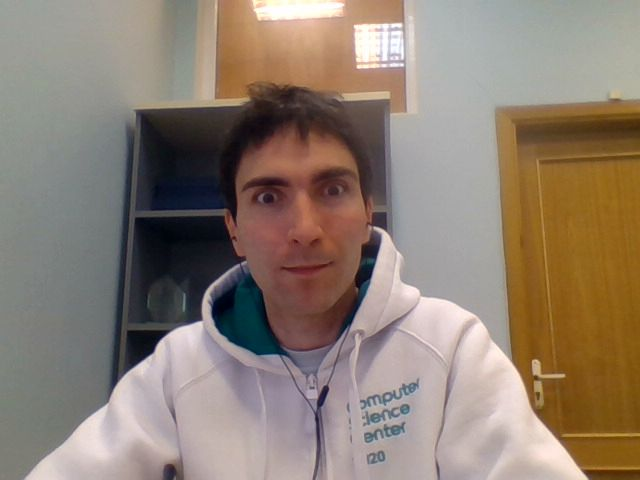

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

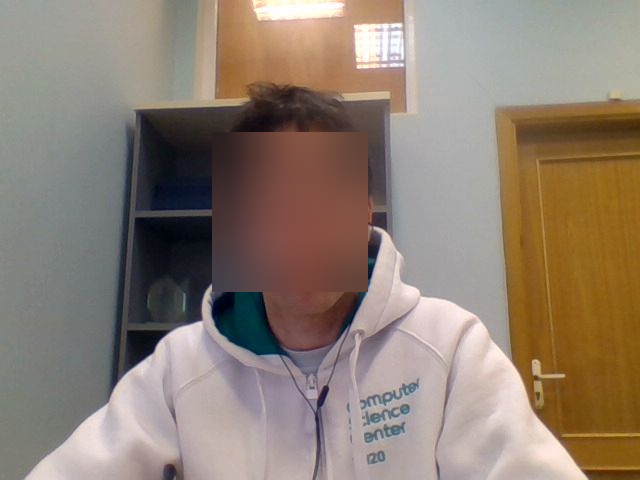

In [ ]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow

# This is a demo of blurring faces in video.

# PLEASE NOTE: This example requires OpenCV (the `cv2` library) to be installed only to read from your webcam.
# OpenCV is *not* required to use the face_recognition library. It's only required if you want to run this
# specific demo. If you have trouble installing it, try any of the other demos that don't require it instead.

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# Initialize some variables
face_locations = []

while True:
    # Grab a single frame of video
    # ret, frame = video_capture.read()
    frame = cv2.imread("webcam.jpg")

    # Resize frame of video to 1/4 size for faster face detection processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(small_frame, model="cnn")

    # Display the results
    for top, right, bottom, left in face_locations:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        # Extract the region of the image that contains the face
        face_image = frame[top:bottom, left:right]

        # Blur the face image
        face_image = cv2.GaussianBlur(face_image, (99, 99), 30)

        # Put the blurred face region back into the frame image
        frame[top:bottom, left:right] = face_image

    # Display the resulting image
    # cv2.imshow('Video', frame)
    cv2_imshow(frame)
    break

    # Hit 'q' on the keyboard to quit!
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Release handle to the webcam
video_capture.release()
cv2.destroyAllWindows()